# Laboratory Session 03

Student: Alice Pagano, Alessandra Sabatti

In [2]:
# Import main packages 
import pandas as pd
import numpy as np
import scipy as sp
#import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.palettes as palette # For palette of colors
import time
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

import os
from lmfit.models import PseudoVoigtModel, LinearModel, LognormalModel
from scipy.integrate import trapz, simps

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### for Palatino and other serif fonts use:
##rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True) 

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = 1/sum(weights)
    return [average, np.sqrt(variance)]

In [3]:
# Import experimental Bulk Dielectric Function for Au 
path      = "data3/Work/01_image.csv"
cols      = pd.read_csv(path, sep=",", nrows=1, header=None).iloc[0].values[0:]
data01 = pd.read_csv(path,sep=",",skiprows=1,header=None,names=cols)

path      = "data3/Work/04_image.csv"
cols      = pd.read_csv(path, sep=",", nrows=1, header=None).iloc[0].values[0:]
data04 = pd.read_csv(path,sep=",",skiprows=1,header=None,names=cols)
data04 = data04.drop(columns=['X','Y'])

path      = "data3/Work/05_image.csv"
cols      = pd.read_csv(path, sep=",", nrows=1, header=None).iloc[0].values[0:]
data05 = pd.read_csv(path,sep=",",skiprows=1,header=None,names=cols)

path      = "data3/Work/07_image.csv"
cols      = pd.read_csv(path, sep=",", nrows=1, header=None).iloc[0].values[0:]
data07 = pd.read_csv(path,sep=",",skiprows=1,header=None,names=cols)
data07 = data07.drop(columns=['X','Y'])

## Preliminary

In [4]:
data01['aspect_ratio'] = data01['Major']/data01['Minor']
data01['R_eff'] = np.sqrt( data01['Area']/np.pi ) 

data04['aspect_ratio'] = data04['Major']/data04['Minor']
data04['R_eff'] = np.sqrt( data04['Area']/np.pi ) 

data05['aspect_ratio'] = data05['Major']/data05['Minor']
data05['R_eff'] = np.sqrt( data05['Area']/np.pi ) 

data07['aspect_ratio'] = data07['Major']/data07['Minor']
data07['R_eff'] = np.sqrt( data07['Area']/np.pi ) 

In [5]:
size01 = 1.484
size04 = 0.9896
size05 = 2.969
size07 = 0.5937 

err01 = size01/np.sqrt(12)
err04 = size04/np.sqrt(12)
err05 = size05/np.sqrt(12)
err07 = size07/np.sqrt(12)

print('err01:',err01)
print('err04:',err04)
print('err05:',err05)
print('err07:',err07)

err01: 0.42839389973870234
err04: 0.28567291319502686
err05: 0.8570764746119994
err07: 0.17138642740894042


In [7]:
mean_max01 = np.mean(data01['Major'])
mean_max04 = np.mean(data04['Major'])
mean_max05 = np.mean(data05['Major'])
mean_max07 = np.mean(data07['Major'])

print('Mean 01:', mean_max01)
print('Mean 04:', mean_max04)
print('Mean 05:', mean_max05)
print('Mean 07:', mean_max07)



data01['err_Major'] = err01
data04['err_Major'] = err04
data05['err_Major'] = err05
data07['err_Major'] = err07

err_mean_max01 = err01/np.sqrt(data01['Major'].shape[0])
err_mean_max04 = err04/np.sqrt(data04['Major'].shape[0])
err_mean_max05 = err05/np.sqrt(data05['Major'].shape[0])
err_mean_max07 = err07/np.sqrt(data07['Major'].shape[0])

print('mean err01:',err_mean_max01)
print('mean err04:',err_mean_max04)
print('mean err05:',err_mean_max05)
print('mean err07:',err_mean_max07)

data = np.array([mean_max01,mean_max04,mean_max05,mean_max07])
err_data = np.array([err_mean_max01,err_mean_max04,err_mean_max05,err_mean_max07])
mean_max = np.mean( data )
print('Mean max:', mean_max,'\n\n')
mean_max_1 = weighted_avg_and_std(data, 1/err_data**2)[0]
err_mean_max_1 = weighted_avg_and_std(data, 1/err_data**2)[1]
print('Mean max 1:', mean_max_1,'\n\n')
print('Err Mean max1 :', err_mean_max_1,'\n\n')

Mean 01: 23.97757345971562
Mean 04: 23.50811450381679
Mean 05: 24.119371042633976
Mean 07: 24.21564772727272
mean err01: 0.017027128866318787
mean err04: 0.017648931517658874
mean err05: 0.01760909531445964
mean err07: 0.01826985454860746
Mean max: 23.955176683359777 


Mean max 1: 23.95143932466465 


Err Mean max1 : 0.008811168107554558 




In [7]:
mean_min01 = np.mean(data01['Minor'])
mean_min04 = np.mean(data04['Minor'])
mean_min05 = np.mean(data05['Minor'])
mean_min07 = np.mean(data07['Minor'])

print('Mean 01:', mean_min01)
print('Mean 04:', mean_min04)
print('Mean 05:', mean_min05)
print('Mean 07:', mean_min07)

mean_min = np.mean( [mean_min01,mean_min04,mean_min05,mean_min07] )
print('Mean min:', mean_min,'\n\n')

data01['err_Minor'] = err01
data04['err_Minor'] = err04
data05['err_Minor'] = err05
data07['err_Minor'] = err07

err_mean01 = err01/np.sqrt(data01['Minor'].shape[0])
err_mean04 = err04/np.sqrt(data04['Minor'].shape[0])
err_mean05 = err05/np.sqrt(data05['Minor'].shape[0])
err_mean07 = err07/np.sqrt(data07['Minor'].shape[0])

print('mean err01:',err_mean01)
print('mean err04:',err_mean04)
print('mean err05:',err_mean05)
print('mean err07:',err_mean07)

Mean 01: 20.287508688783593
Mean 04: 20.029824427480918
Mean 05: 19.99388096243138
Mean 07: 20.306727272727276
Mean min: 20.15448533785579 


mean err01: 0.017027128866318787
mean err04: 0.017648931517658874
mean err05: 0.01760909531445964
mean err07: 0.01826985454860746


In [8]:
mean_area01 = np.mean(data01['Area'])
mean_area04 = np.mean(data04['Area'])
mean_area05 = np.mean(data05['Area'])
mean_area07 = np.mean(data07['Area'])

print('Mean 01:', mean_area01)
print('Mean 04:', mean_area04)
print('Mean 05:', mean_area05)
print('Mean 07:', mean_area07,'\n\n')

data01['err_Area'] = err01*np.sqrt(2)
data04['err_Area'] = err04*np.sqrt(2)
data05['err_Area'] = err05*np.sqrt(2)
data07['err_Area'] = err07*np.sqrt(2)

err_mean_area01 = err01*np.sqrt(2)/np.sqrt(data01['Area'].shape[0])
err_mean_area04 = err04*np.sqrt(2)/np.sqrt(data04['Area'].shape[0])
err_mean_area05 = err05*np.sqrt(2)/np.sqrt(data05['Area'].shape[0])
err_mean_area07 = err07*np.sqrt(2)/np.sqrt(data07['Area'].shape[0])

print('mean err01:',err_mean_area01)
print('mean err04:',err_mean_area04)
print('mean err05:',err_mean_area05)
print('mean err07:',err_mean_area07)


Mean 01: 395.5224202211691
Mean 04: 384.0756870229007
Mean 05: 392.2959886027862
Mean 07: 400.1124659090909 


mean err01: 0.02407999657102245
mean err04: 0.024959358313667152
mean err05: 0.02490302141482935
mean err07: 0.025837476085224454


In [9]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = 1/sum(weights)
    return [average, np.sqrt(variance)]

data01['err_R_eff'] = data01['err_Area'] * 1/(2 * np.sqrt(np.pi) * np.sqrt(data01['Area'])) 
data04['err_R_eff'] = data04['err_Area'] * 1/(2 * np.sqrt(np.pi) * np.sqrt(data04['Area'])) 
data05['err_R_eff'] = data05['err_Area'] * 1/(2 * np.sqrt(np.pi) * np.sqrt(data05['Area'])) 
data07['err_R_eff'] = data07['err_Area'] * 1/(2 * np.sqrt(np.pi) * np.sqrt(data07['Area']))  

mean01 = weighted_avg_and_std(data01['R_eff'], 1/data01['err_R_eff']**2)[0]
mean04 = weighted_avg_and_std(data04['R_eff'], 1/data04['err_R_eff']**2)[0]
mean05 = weighted_avg_and_std(data05['R_eff'], 1/data05['err_R_eff']**2)[0]
mean07 = weighted_avg_and_std(data07['R_eff'], 1/data07['err_R_eff']**2)[0]

print('Mean 01:', mean01)
print('Mean 04:', mean04)
print('Mean 05:', mean05)
print('Mean 07:', mean07,'\n\n')

mean_R = np.mean(np.array([mean01,mean04,mean05,mean07]))

err_mean_R01 = weighted_avg_and_std(data01['R_eff'], 1/data01['err_R_eff']**2)[1]
err_mean_R04 = weighted_avg_and_std(data04['R_eff'], 1/data04['err_R_eff']**2)[1]
err_mean_R05 = weighted_avg_and_std(data05['R_eff'], 1/data05['err_R_eff']**2)[1] 
err_mean_R07 = weighted_avg_and_std(data07['R_eff'], 1/data07['err_R_eff']**2)[1]

print('mean err01:',err_mean_R01)
print('mean err04:',err_mean_R04)
print('mean err05:',err_mean_R05)
print('mean err07:',err_mean_R07)

data01

Mean 01: 11.803246380692896
Mean 04: 11.650413356330018
Mean 05: 11.763925583869964
Mean 07: 11.910737952052067 


mean err01: 0.0003415591589268441
mean err04: 0.00035926927346330913
mean err05: 0.0003546828392743253
mean err07: 0.00036437965005063676


,,Area,Major,Minor,Angle,aspect_ratio,R_eff,err_Major,err_Minor,err_Area,err_R_eff
0,1,129.933,13.139,12.591,28.066,1.043523,6.431093,0.428394,0.428394,0.60584,0.014993
1,2,440.451,25.307,22.160,157.494,1.142013,11.840604,0.428394,0.428394,0.60584,0.008143
2,3,299.507,21.735,17.545,17.894,1.238814,9.764018,0.428394,0.428394,0.60584,0.009875
3,4,455.867,24.334,23.853,6.947,1.020165,12.046036,0.428394,0.428394,0.60584,0.008005
4,5,262.068,18.897,17.658,44.863,1.070166,9.133391,0.428394,0.428394,0.60584,0.010557
...,...,...,...,...,...,...,...,...,...,...,...
628,629,425.035,24.734,21.880,60.456,1.130439,11.631545,0.428394,0.428394,0.60584,0.008290
629,630,519.732,25.808,25.641,159.066,1.006513,12.862186,0.428394,0.428394,0.60584,0.007497
630,631,361.170,23.255,19.774,106.490,1.176039,10.722126,0.428394,0.428394,0.60584,0.008993
631,632,336.945,22.534,19.038,54.347,1.183633,10.356299,0.428394,0.428394,0.60584,0.009311


## Aspect ratio histogram

In [18]:
df = pd.concat([data01,data04,data05,data07], axis=0)
df = df[df['aspect_ratio']<3]

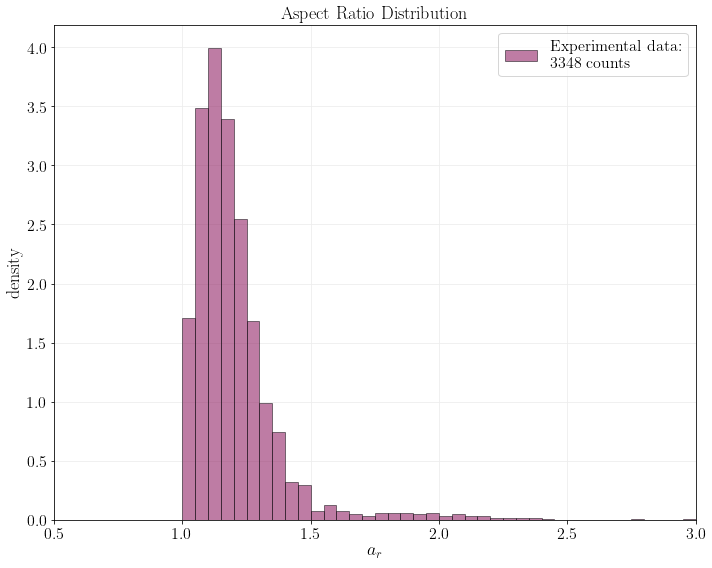

In [20]:
data = df['aspect_ratio']
n =  data.shape[0]
N = 40 #int( 1 + np.log2(n) )  

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
string1 = 'Experimental data:\n'+str(n)+' counts'

axes.hist(data, N, density=True, align='mid',color=palette.inferno(6)[2],
                                alpha=0.6, edgecolor=palette.inferno(6)[0],linewidth=0.8,label=string1)
axes.set_title(r'Aspect Ratio Distribution',fontsize=18)
axes.set_xlabel(r'$a_{r}$',fontsize=18)
axes.set_ylabel(r'density',fontsize=18)
axes.grid(color='0.93')
axes.legend(fontsize=16,title_fontsize=18,loc='best')
axes.tick_params(axis="x", labelsize=16)
axes.tick_params(axis="y", labelsize=16)
axes.set_axisbelow(True)
axes.set_xlim(0.5,3)
if not os.path.isdir('./data3/images'):
        os.mkdir('./data3/images')
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.tight_layout()
plt.savefig('data3/images/histogram_ar.pdf', format='pdf')

## Fit with all datasets

In [ ]:
df = pd.concat([data01,data04,data05,data07], axis=0)

In [ ]:
#plt.step(bins_centers,count,where='mid',color='b')
#plt.plot(bins_centers,count,'.',color='r')

#fig, axes = plt.subplots(1, 1, figsize=(10, 8))
#
#axes.hist(data, N, density=True, align='mid',color=palette.inferno(6)[2],
#                                alpha=0.6, edgecolor=palette.inferno(6)[0],linewidth=1.2,
#                                weights=weights)
##plt.hist(data, N, density=False, align='mid',color=palette.inferno(6)[1],
##                                alpha=0.2, edgecolor=palette.inferno(6)[0],linewidth=1.2)
#
#
#plt.xlabel('$R_{eff}$ (nm)',fontsize=18)
#plt.ylabel('density',fontsize=18)
#
#plt.tick_params(axis="x", labelsize=16)
#plt.tick_params(axis="y", labelsize=16)

In [ ]:
data = df['R_eff']
weights = [1] * df['err_R_eff'].shape[0] #/np.sqrt(df['err_R_eff']) #**2
n =  data.shape[0]
N = 30 #int( 1 + np.log2(n) )  

#edge = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)

count, bins = np.histogram(data,bins=N,density=True,weights=weights)
bins_centers = (bins[1:]+bins[:-1])/2 # find bincenters
binwidth = (bins[1:]-bins[:-1])  

x = bins_centers
y = count 
mean = mean_R


# MODEL
model = LognormalModel(prefix='lognormal_')
params = model.make_params(center=mean, sigma=2)
out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.5))

amplitude = out.params['lognormal_amplitude'].value
center = out.params['lognormal_center'].value
sigma = out.params['lognormal_sigma'].value
height = out.params['lognormal_height'].value

mean_dist = np.exp(center + sigma**2/2)
print('Mean:', mean_dist)

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
string1 = 'Experimental data:\n'+str(n)+' counts'

axes.hist(data, N, density=True, align='mid',color=palette.inferno(6)[2],
                                alpha=0.6, edgecolor=palette.inferno(6)[0],linewidth=0.8,weights=weights, label=string1)
string= 'Log-normal distribution:  \n A='+str(round(amplitude,3))+', $\\mu$='+str(round(center,3))+', $\\sigma$='+str(round(sigma,3))

#c = (trapz(out.best_fit, x))**(-1)
#area = trapz(out.best_fit*c, x)
#print('Area:', area)

result_fit = out.best_fit #* c

def log_normal(x,A,mu,sigma):
    return A/(sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2 * sigma**2)) / x

x1 = np.linspace(2,25,50)
axes.plot(x1, log_normal(x1,amplitude,center,sigma), 'r-', color=palette.inferno(6)[4],label=string,linewidth=3)
#axes.plot(x, result_fit, 'r-', color=palette.inferno(6)[4],label=string,linewidth=3)
axes.set_title(r'Log-normal Fit',fontsize=18)
axes.set_xlabel(r'$R_{eff}$ (nm)',fontsize=18)
axes.set_ylabel(r'density',fontsize=18)
axes.grid(color='0.93')
axes.legend(fontsize=16,title_fontsize=18,loc='best')
axes.tick_params(axis="x", labelsize=16)
axes.tick_params(axis="y", labelsize=16)
axes.set_axisbelow(True)

if not os.path.isdir('./data3/images'):
        os.mkdir('./data3/images')
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.tight_layout()
plt.savefig('data3/images/histogram_fit.pdf', format='pdf')


In [ ]:
c = (trapz(log_normal(x1,amplitude,center,sigma), x1))**(-1)
area = trapz(log_normal(x1,amplitude,center,sigma)*c, x1)
print('Area:', area)

## Fit separated

### Fit 01 data

In [ ]:
data = data01['R_eff']
n =  data.shape[0]
N = int( 1 + np.log2(n) )  

#edge = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)

count, bins = np.histogram(data,bins=N,density=False)
bins_centers = (bins[1:]+bins[:-1])/2 # find bincenters
binwidth = (bins[1:]-bins[:-1])  
plt.step(bins_centers,count,where='mid',color='b')
plt.plot(bins_centers,count,'.',color='r')
plt.xlabel('$R$ (nm)',fontsize=18)
plt.ylabel('density',fontsize=18)

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)


x = bins_centers
y = count 
n_image = '01'
mean = mean01


# MODEL
model = LognormalModel(prefix='lognormal_')
params = model.make_params(center=mean, sigma=2)
out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.5))

amplitude = out.params['lognormal_amplitude'].value
center = out.params['lognormal_center'].value
sigma = out.params['lognormal_sigma'].value
height = out.params['lognormal_height'].value

mean_dist = np.exp(center + sigma**2/2)

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.plot(x, y, 'b',color='#440154',label='Experimental data')
string= 'Fit:  mean='+str(round(mean_dist,3))+', $\\sigma$ ='+str(round(sigma,3))

axes.plot(x, out.best_fit, 'r-', color='#22A784',label=string)
axes.set_title(r'Lognormal fit for '+n_image+' image',fontsize=18)
axes.set_xlabel(r'$R$ (nm)',fontsize=18)
axes.set_ylabel(r'Counts',fontsize=18)
axes.grid(color='0.93')
axes.legend(fontsize=18,title_fontsize=18,loc='best')
axes.tick_params(axis="x", labelsize=16)
axes.tick_params(axis="y", labelsize=16)

if not os.path.isdir('./data3/images'):
        os.mkdir('./data3/images')
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.tight_layout()
plt.savefig('data3/images/peak.pdf', format='pdf')


### Fit 04 data

In [ ]:
data = data04['R_eff']
n =  data.shape[0]
N = int( 1 + np.log2(n) )  

#edge = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)

count, bins = np.histogram(data,bins=N,density=False)
bins_centers = (bins[1:]+bins[:-1])/2 # find bincenters
binwidth = (bins[1:]-bins[:-1])  
plt.step(bins_centers,count,where='mid',color='b')
plt.plot(bins_centers,count,'.',color='r')
plt.xlabel('$R$ (nm)',fontsize=18)
plt.ylabel('density',fontsize=18)

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)


x = bins_centers
y = count 
n_image = '04'
mean = mean04


# MODEL
model = LognormalModel(prefix='lognormal_')
params = model.make_params(center=mean, sigma=2)
out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.5))

amplitude = out.params['lognormal_amplitude'].value
center = out.params['lognormal_center'].value
sigma = out.params['lognormal_sigma'].value
height = out.params['lognormal_height'].value

mean_dist = np.exp(center + sigma**2/2)

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.plot(x, y, 'b',color='#440154',label='Experimental data')
string= 'Fit:  mean='+str(round(mean_dist,3))+', $\\sigma$ ='+str(round(sigma,3))

axes.plot(x, out.best_fit, 'r-', color='#22A784',label=string)
axes.set_title(r'Lognormal fit for '+n_image+' image',fontsize=18)
axes.set_xlabel(r'$R$ (nm)',fontsize=18)
axes.set_ylabel(r'Counts',fontsize=18)
axes.grid(color='0.93')
axes.legend(fontsize=18,title_fontsize=18,loc='best')
axes.tick_params(axis="x", labelsize=16)
axes.tick_params(axis="y", labelsize=16)

if not os.path.isdir('./data3/images'):
        os.mkdir('./data3/images')
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.tight_layout()
plt.savefig('data3/images/peak.pdf', format='pdf')



### Fit 05 data

In [ ]:
data = data05['R_eff']
n =  data.shape[0]
N = int( 1 + np.log2(n) )  

#edge = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)

count, bins = np.histogram(data,bins=N,density=False)
bins_centers = (bins[1:]+bins[:-1])/2 # find bincenters
binwidth = (bins[1:]-bins[:-1])  
plt.step(bins_centers,count,where='mid',color='b')
plt.plot(bins_centers,count,'.',color='r')
plt.xlabel('$R$ (nm)',fontsize=18)
plt.ylabel('density',fontsize=18)

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)


x = bins_centers
y = count 
n_image = '05'
mean = mean05


# MODEL
model = LognormalModel(prefix='lognormal_')
params = model.make_params(center=mean, sigma=2)
out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.5))

amplitude = out.params['lognormal_amplitude'].value
center = out.params['lognormal_center'].value
sigma = out.params['lognormal_sigma'].value
height = out.params['lognormal_height'].value

mean_dist = np.exp(center + sigma**2/2)

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.plot(x, y, 'b',color='#440154',label='Experimental data')
string= 'Fit:  mean='+str(round(mean_dist,3))+', $\\sigma$ ='+str(round(sigma,3))

axes.plot(x, out.best_fit, 'r-', color='#22A784',label=string)
axes.set_title(r'Lognormal fit for '+n_image+' image',fontsize=18)
axes.set_xlabel(r'$R$ (nm)',fontsize=18)
axes.set_ylabel(r'Counts',fontsize=18)
axes.grid(color='0.93')
axes.legend(fontsize=18,title_fontsize=18,loc='best')
axes.tick_params(axis="x", labelsize=16)
axes.tick_params(axis="y", labelsize=16)

if not os.path.isdir('./data3/images'):
        os.mkdir('./data3/images')
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.tight_layout()
plt.savefig('data3/images/peak.pdf', format='pdf')



### Fit 07 data

In [ ]:
data = data07['R_eff']
n =  data.shape[0]
N = int( 1 + np.log2(n) )  

#edge = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)

count, bins = np.histogram(data,bins=N,density=False)
bins_centers = (bins[1:]+bins[:-1])/2 # find bincenters
binwidth = (bins[1:]-bins[:-1])  
plt.step(bins_centers,count,where='mid',color='b')
plt.plot(bins_centers,count,'.',color='r')
plt.xlabel('$R$ (nm)',fontsize=18)
plt.ylabel('density',fontsize=18)

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)


x = bins_centers
y = count 
n_image = '07'
mean = mean07


# MODEL
model = LognormalModel(prefix='lognormal_')
params = model.make_params(center=mean, sigma=2)
out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.5))

amplitude = out.params['lognormal_amplitude'].value
center = out.params['lognormal_center'].value
sigma = out.params['lognormal_sigma'].value
height = out.params['lognormal_height'].value

mean_dist = np.exp(center + sigma**2/2)

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.plot(x, y, 'b',color='#440154',label='Experimental data')
string= 'Fit:  mean='+str(round(mean_dist,3))+', $\\sigma$ ='+str(round(sigma,3))

axes.plot(x, out.best_fit, 'r-', color='#22A784',label=string)
axes.set_title(r'Lognormal fit for '+n_image+' image',fontsize=18)
axes.set_xlabel(r'$R$ (nm)',fontsize=18)
axes.set_ylabel(r'Counts',fontsize=18)
axes.grid(color='0.93')
axes.legend(fontsize=18,title_fontsize=18,loc='best')
axes.tick_params(axis="x", labelsize=16)
axes.tick_params(axis="y", labelsize=16)

if not os.path.isdir('./data3/images'):
        os.mkdir('./data3/images')
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.tight_layout()
plt.savefig('data3/images/peak.pdf', format='pdf')

